# Analyzing the COVID-19 Mortality Rate with respect to Different Variables

*$\color{gray}{\text{ "What factors will create significant impacts on the COVID-19 mortality rate? And how?" }}$*

### Examine the Relation between the COVID-19 Mortality Rate and Confirmation Count, Death Count, Countries and their Individual Wealth, Omicron Proportion

------
*Chenxu Robin Mao | robin.mao@mail.utoronto.ca | 2023-02-25 Proejct 2 Version*


##### Data source
> COVID-19 Global Confirmation/Death: *https://github.com/CSSEGISandData/COVID-19*

> Global Population: *https://data.worldbank.org/indicator/SP.POP.TOTL*

> COVID-19 Variants: *https://www.kaggle.com/datasets/gpreda/covid19-variants*

> GDP per Capita: *https://data.worldbank.org/indicator/NY.GDP.PCAP.CD*

> GDP: *https://data.worldbank.org/indicator/NY.GDP.MKTP.CD*

> Dictatorship Index: *https://www.kaggle.com/datasets/mathurinache/democracy-dictatorship-index*

> Country Code: *https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes*

> Literacy Rate: *https://data.worldbank.org/indicator/SE.ADT.LITR.ZS*

<br>


-----
## Outline
*(The initial structure would be more linear. However, it was altered for marking purpose.)*

<br>

- [**Preparation**](#Preparation)

    - [Module Installation](#Module-Installation)
    - [Libraries Loading](#Libraries-Loading)
    - [Data Set Loading](#Data-Set-Loading)

    <br>

- [**Project One**](#project-one)
    - [**Introduction**](#introduction)

    <br>

    - [**Data Cleaning**](#data-cleaning)

        - [COVID-19 Mortality Rate, Confirmation Count and Death Count](#data-cleaning:-covid-19-mortality-rate,-confirmation-count-and-death-count)
        - [Mortality Rate in Different Countries](#data-cleaning-mortality-rate-in-different-countries)
        - [The Relation between GDP per Capita and Mortality Rate](#data-cleaning-the-relation-between-gdp-per-capita-and-mortality-rate)
        - [Omicron Variant Proportion and the Mortality Rate](#data-cleaning-omicron-variant-proportion-and-the-mortality-rate)
    
    <br>

    - [**Summary Statistics Tables**](#summary-statistics-tables)

        - [COVID-19 Mortality Rate, Confirmation Count and Death Count](#summary-statistics-table-seasonal-confirmation-count-death-count-and-mortality-rate)
        - [Mortality Rate in Different Countries](#summary-statistics-table-mortality-rate-in-different-countries)
        - [The Relation between GDP per Capita and Mortality Rate](#data-cleaning-the-relation-between-gdp-per-capita-and-mortality-rate)
        - [Omicron Variant Proportion and the Mortality Rate](#summary-statistics-table-omicron-variant-proportion)

    <br>

    - [**Plots, Histograms, Figures**](#plots,-histograms,-figures)
    
        - [COVID-19 Mortality Rate, Confirmation Count and Death Count](#plot-seasonal-confirmation-count-death-count-and-mortality-rate)
        - [Mortality Rate in Different Countries](#plot-mortality-rate-in-different-countries)
        - [The Relation between GDP per Capita and Mortality Rate](#plot-the-relation-between-gdp-per-capita-and-mortality-rate)
        - [Omicron Variant Proportion and the Mortality Rate](#plot-omicron-proportion-and-mortality-rate)

    <br>
    

- [**Project Two**](#project-two)

    - [**The Message**](#the-message)

        - [**Data Cleaning**](#project-two-data-cleaning)

            - [The Role of GDP regarding the Mortality Rate among Countries](#data-cleaning-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)
            - [The Role of Governmental Mode regarding the Mortality Rate among Countries](#data-cleaning-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)
            - [The Role of Literacy Rate regarding the Mortality Rate among Countries](#data-cleaning-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

        - [**Summary Statistics Tables**](#project-two-summary-statistics-tables)

            - [The Role of GDP regarding the Mortality Rate among Countries](#summary-statistics-table-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)
            - [The Role of Governmental Mode regarding the Mortality Rate among Countries](#summary-statistics-table-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)
            - [The Role of Literacy Rate regarding the Mortality Rate among Countries](#summary-statistics-table-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

        - [**Plots**](#project-two-plts)

            - [The Role of GDP regarding the Mortality Rate among Countries](#plots-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)
            - [The Role of Governmental Mode regarding the Mortality Rate among Countries](#plot-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)
            - [The Role of Literacy Rate regarding the Mortality Rate among Countries](#plots-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

    <br>

    - [**Maps and Intrepretations**](#maps-and-interpretations)

        - [High GDP Countries Distribution](#map-countries-with-high-gdp)

        - [Mortality Rate Color Map with High GDP](#map-mortality-rate-distribution-color-map)

        - [Mortality Rate Diecrete Color Map with Low GDP](#map-mortality-rate-distribution-discrete-color-map)

    <br>

    - [**Conclusion**](#conclusion)

    - [**References**](#references)

    <br>

<br>

------
# Preparation

<br>

### Module Installation

In [805]:
# uncomment following line to install
# ! pip install --upgrade pip
# ! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
# ! pip install matplotlib
# ! pip install qeds
# ! pip install geopandas

This part is for module installation purpose.

<br>

### Libraries Loading

In [806]:
# import pandas data module
import pandas as pd

# import geographic module
import geopandas as gpd

# import graphing module
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# import Point for geo-graphing
from shapely.geometry import Point

This part is for libraries installation purpose.

<br>

### Data Set Loading

Let us begin with data loading and take a glimpse at the first five rows.

*notice: github data updates daily.*

In [807]:
# data on global COVID-19 confirmation count
global_confirm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# data on global COVID-19 mortality count
global_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# world population data
population = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')

# GDP per capita data
GDP = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4888903.csv', on_bad_lines='skip')

# global variants data
variants = pd.read_csv('covid-variants.csv')

# take a glimpse at the first five rows of the global_confirm data
global_confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209153,209181,209181,209215,209230,209246,209274,209308,209322,209340
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334315,334336,334336,334345,334356,334373,334378,334380,334391,334408
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271426,271428,271431,271432,271436,271439,271440,271440,271441,271448
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47866,47866,47866,47866,47866,47866,47866,47866,47875
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105184,105184,105205,105205,105205,105205,105205,105255,105255,105277


As we can see from above, the *global_confirm* data set consists of numerous variables *province/state name*, *latitude*, *cumulative confirmation count on a specific date*, etc.

The Y-variable is *the COVID-19 mortality rate*, and the X-variable varies among the topics. We will state the X-variable when we get into the detailed topics. 

<br>

---------
# Project One

Project 1 consists of five research questions.
They can be easily accessed in the outline [here](#outline).

## Introduction

To date, the COVID-19 epidemic is still a major global concern. With recent data shows the COVID-19 confirmation toll reaching 671M with the total death toll of 6.83M $^{(1)}$. Different governmental institutions around the globe have brought up various policies to ensure public health; however, the distortion brought by the virus is irreversible. Thus, with the data provided by Johns Hopkins University, the World Bank and Kaggle, this report is going to investigate the relations between the COVID-19 mortality rate and certain variables, including COVID-19 confirmation count, death count, countries and their individual wealth and omicron proportion (terms will be formally defined later).

Throughout this report, the y variable will be the COVID-19 mortality rate. As being infected by COVID-19 is not as terrible as getting lethal result. Instead of mortality count, mortality rate is chosen as count is not as representative in terms of variables such as *countries* there exist different population base; as well as mortality rate will be a more challenging topic as it requires more intra-dataset calculations.

The choice of x variables includes confirmation count, death count, countries, omicron proportion. They will vary among the topics and will be introduced in detail and defined in each section. The goal of this report is to find factors that will create significant impacts on the y variable, and analyse their relation if so, or, rephrased as a research question, **"What factors will create significant impacts on the COVID-19 mortality rate?"**

To ensure precision and integrity, more detailed summaries are broken down and given in the beginning of each section with definition, including *how they are related to the research question, why they are important for the analysis, etc.*

The research questions of project 1 includes:

- [Do there exist similar trends between confirmation count and mortality rate? How about death count and mortality rate?](#project-one-COVID-19-mortality-rate,-confirmation-count-and-death-count)

- [Does mortality rate vary among countries?](#project-one-mortality-rate-in-different-countries)

- [What is the relation between GDP per capita and the COVID-19 mortality rate?](#project-one-the-relation-between-gdp-per-capita-and-mortality-rate)

- [Do countries with higher omicron variant proportion have a higher mortality rate?](#project-one-omicron-variant-proportion-and-the-mortality-rate)

Detailed explaination, goals and variables are explained in the following section. However, you can skip to the data cleaning section by clicking [here](#data-cleaning).

<br>

-----
### Project One: COVID-19 Mortality Rate, Confirmation Count and Death Count

*$\color{blue}{\text{ "Do there exist similar trends between confirmation count and mortality rate? How about death count and mortality rate?"}}$*

Let us give definitions first.


> $\color{red}{\text{ COVID-19 Mortality Rate}}$: the estimated probability *(sampled from the population)* that a COVID-19-infected individual will result in disease-related mortality.

> $\color{red}{\text{ Confirmation Number}}$: the population count of clinical diagonsed infected individuals. Can be referred to as *"Case Count"*, *"Confirm Count"*, etc.


The x variables here are **confirmation count** and **death count**. We are going to analyze their relations with the mortality rate. I chose two analyze two relations together as confirmation count and death count are highly related (and similar to some point), and we can examine the relation between the two x variables as a byproduct which could be helpful towards future projects.

Confirmation count is chosen as an x variable since individuals must be contagious with COVID-19 to have a mortal probability (although not necessary clinical diagnosed positive); Thus data might show a somewhat significant relation between the mortality rate and the confirmation count. The relationship would be **the mortality rate will increase overtime as the confirmation count rises, vice versa**. 

The death count is chosen as another x variable because if we hold the population fixed, once the death count goes up, by definition there will be a rise in the mortality rate. A relation might exists between the two, and their trend that **the mortality rate will rise as the death count rises over time**.

Contents:
- Data Cleaning: [here](#data-cleaning-covid-19-mortality-rate-confirmation-count-and-death-count)
- Summary Statistics Table: [here](#summary-statistics-table-seasonal-confirmation-count-death-count-and-mortality-rate)
- Plot: [here](#plot-seasonal-confirmation-count-death-count-and-mortality-rate)

<br>

### Project One: Mortality Rate in Different Countries

*$\color{blue}{\text{ "Does mortality rate vary among countries?"}}$*

After denying the relation between the confirmation count and mortality rate given data and concluding the relation between the death count and mortality rate, let us figure if other factors impact the mortality rate.

As different countries had different response when the epidemic arised, and it is obvious that to date some countries did a great job while some did not. A recent report shows that tere are countries like the US with 104,393,464 confirmation count to date $^{(6)}$, and there is countries like Tokelau with a confirmation count of 5. This vast difference among the categorial data is interesting.

Thus the initial assumption here is **different countries will have different mortality rates due to the variations in exogenous factors**. If so, let us determine what economic traits will result in a low mortality rate.

To calculate the individual mortality rate among different countries, we have to use the World Bank population data imported in [here](#Data-Set-Loading). We first need to clean the data set to get the variables we want.

Content:
- Data Cleaning: [here](#data-cleaning-mortality-rate-in-different-countries)
- Summary Statistics Table: [here](#summary-statistics-table-mortality-rate-in-different-countries)
- Plot: [here](#plot-mortality-rate-in-different-countries)

<br>

### Project One: The Relation between GDP per Capita and Mortality Rate

*$\color{blue}{\text{ "What is the relation between GDP per capita and the COVID-19 mortality rate?"}}$*

Why is GDP per capita chosen instead of GDP? Because GDP is not representative enough for quality of life and individual wealth, and theoretically nations with more personal wealth can provide its citizens better medical resources, public sanitization, etc.

To enhance our understanding in the topic, let us find the countries with most GDP per capita and least GDP per capita first.

Content:
- Data Cleaning: [here](#data-cleaning-the-relation-between-gdp-per-capita-and-mortality-rate)
- Summary Statistics Tables: [here](#summary-statistics-table-gdp-per-capita-and-mortality-rate)
- Plot: [here](#plot-the-relation-between-gdp-per-capita-and-mortality-rate)

<br>

### Project One: Omicron Variant Proportion and the Mortality Rate

*$\color{blue}{\text{ "Do countries with higher omicron variant proportion have a higher mortality rate?"}}$*

Let us define the new term.

| $\color{red}{\text{ Omicron Variant Proportion}}$: the estimated proportion of Omicron COVID-19 case out of the total COVID-19 confirmation count. Can be referred to as *"omicron proportion"*, etc.

To date, there exist more than 50 COVID-19 variants, according to data from John Hopkins Medicine $^{(7)}$. Each time COVID-19 mutates, it becomes more lethal or easier to spread. Thus do countries with higher omicron variant proportion have a higher mortality rate? The initial hypothesis is that **countries with a higher omicron variant proportion will have a higher mortality rate** because the omicron variant is more lethal than the initial COVID-19 virus.

The x variable here is the omicron proportion calculated from variants and the global confirmation count data set, and the y variable is the mortality proportion calculated from the global death data set and the population data set.

Content:
- Data Cleaning: [here](#data-cleaning-omicron-variant-proportion-and-the-mortality-rate)
- Summary Statistics Table: [here](#data-cleaning-omicron-variant-proportion-and-the-mortality-rate)
- Plot: [here](#plot-omicron-proportion-and-mortality-rate)

<br>

-----
## Data Cleaning

### Data Cleaning: COVID-19 Mortality Rate, Confirmation Count and Death Count

In [808]:
### get our target variable

# select all case count from thed DataFrame
global_confirm_cum = global_confirm.iloc[:,4:]
global_death_cum = global_death.iloc[:,4:]

# sum up the total case count
global_confirm_cum = global_confirm_cum.sum()
global_death_cum = global_death_cum.sum()

In this case, the X variables we used include *confirmation count*, *death count*, and the Y variable is the *mortality rate*.

After cleaning the data set, the *global_confirm_cum* data set sums up the global COVID-19 cumulative case count, and the *global_death_cum* data set sums up the global COVID-19 cumulative mortality count.

To access the next step for this question, click [here](#summary-statistics-table-seasonal-confirmation-count-death-count-and-mortality-rate).

<br>


### Data Cleaning: Mortality Rate in Different Countries

In [809]:
### data cleaning

# clean the population DataFrame
population = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')
population = population.drop([266,267,268,269,270])
population = population.rename(columns= {'Country Name': 'Country/Region'})
population = population.loc[:,['Country/Region','2022 [YR2022]']]

### calculating table regarding each countries' mortality rate

# reset index and choose death count columns
country_death = global_death.set_index('Country/Region').iloc[:,3:]
country_total_death = country_death.loc[:,['12/23/22']]
country_total_death = country_total_death.rename(columns={'12/23/22':'Death Toll'})

# sum up duplicates(different provinces within the same country)
country_total_death = country_total_death.groupby([country_total_death.index]).sum()

# reset index
country_total_death = country_total_death.reset_index()

# merge the data sets
country_death_population = pd.merge(country_total_death, population, how = 'left', on = 'Country/Region')

# drop the na values
country_death_population = country_death_population.dropna()

# rename the column
country_death_population = country_death_population.rename(columns = {'2022 [YR2022]': 'Population'})

The x variable we are using here is **countries**, while the y variable is their individual **mortality rate**, which is calculated from the COVID-19 death data combined with the population data.

To access the next step for this question, click [here](#summary-statistics-table-mortality-rate-in-different-countries).

<br>

### Data Cleaning: The Relation between GDP per Capita and Mortality Rate

In [810]:
### data cleaning

country_death_population_GDP = country_death_population.copy()

# GDP = GDP[['Country Name']]
if len(GDP.T) >= 5:
    GDP = GDP[['Country Name', '2021']]

country_death_population_GDP = pd.merge(GDP, country_death_population_GDP, left_on='Country Name', right_on ='Country/Region',how='inner')
country_death_population_GDP = country_death_population_GDP.drop(columns='Country/Region').rename(columns={'2021':'GDP per Capita'})
country_death_population_GDP['Mortality Rate (%)'] = (country_death_population_GDP['Death Toll'].astype(int) / country_death_population_GDP['Population'].astype(int))*100

We now merged the table *country_death_population* with the GDP per capita data set.

The X variable is country and the Y variable is mortality rate.

To access the next step for this question, click [here](#summary-statistics-table-gdp-per-capita-and-mortality-rate).

<br>

### Data Cleaning: Omicron Variant Proportion and the Mortality Rate

Again, let us clean the two datasets, calculate the values and take a glimpse first.

> *The variants dataset is loaded [here](#Data-Set-Loading).*

In [811]:
### glimpse

variants.head(3)

### merge and calculate the value

country_confirm = global_confirm.set_index('Country/Region').iloc[:,3:]
country_total_confirm = country_confirm.loc[:,['12/31/20']]
country_total_confirm = country_total_confirm.rename(columns={'12/31/20':'Confirm Toll'})
country_total_confirm = country_total_confirm.groupby([country_total_confirm.index]).sum()
country_total_confirm = country_total_confirm.reset_index()
country_death_population = country_death_population.rename(columns={'Country':'Country/Region'})
country_death_confirm_population = pd.merge(country_death_population, country_total_confirm, on = 'Country/Region', how = 'inner')

variants_df = variants.loc[:,['location','date','variant']]
variants_df = variants_df.rename(columns={'location':'Country/Region','date':'Date','variant':'Type'})
omicron_df = variants_df[variants_df.Type == 'Omicron']
omicron_df = omicron_df.rename(columns={'Country/Region':'Country'})
country_death_confirm_population = country_death_confirm_population.rename(columns={'Country/Region':'Country'})

As we can see, the variants data set contains info such as location, date, variant types, sequence info, etc. Sequences and dates (which will be summed up later) are not useful towards our question thus the variables we are using from this dataset are *location and variant*.

Let us clean the data to get what we want.

In [812]:
### merge and calculate the value

country_confirm = global_confirm.set_index('Country/Region').iloc[:,3:]
country_total_confirm = country_confirm.loc[:,['12/31/20']]
country_total_confirm = country_total_confirm.rename(columns={'12/31/20':'Confirm Toll'})
country_total_confirm = country_total_confirm.groupby([country_total_confirm.index]).sum()
country_total_confirm = country_total_confirm.reset_index()
country_death_population = country_death_population.rename(columns={'Country':'Country/Region'})
country_death_confirm_population = pd.merge(country_death_population, country_total_confirm, on = 'Country/Region', how = 'inner')

variants_df = variants.loc[:,['location','date','variant']]
variants_df = variants_df.rename(columns={'location':'Country/Region','date':'Date','variant':'Type'})
omicron_df = variants_df[variants_df.Type == 'Omicron']
omicron_df = omicron_df.rename(columns={'Country/Region':'Country'})
country_death_confirm_population = country_death_confirm_population.rename(columns={'Country/Region':'Country'})

# generate a loop to compare and input data
res = []
for i in country_death_confirm_population['Country']:
    j = omicron_df[omicron_df.Country == i].count().Country.astype(int)
    res.append(j)
    if j != 0:
        country_death_confirm_population.loc[country_death_confirm_population[country_death_confirm_population.Country == i].index,'Omicron Count'] = j
    else:
        country_death_confirm_population.loc[i,'Omicron Count'] = None
        
country_death_confirm_population = country_death_confirm_population.dropna(0)
country_death_confirm_population['Omicron Prop (%)'] = (country_death_confirm_population['Omicron Count'] / country_death_confirm_population['Confirm Toll']) * 100
country_death_confirm_population['Death Toll'] = country_death_confirm_population['Death Toll'].astype(int)
country_death_confirm_population['Population'] = country_death_confirm_population['Population'].astype(int)
country_death_confirm_population['Confirm Toll'] = country_death_confirm_population['Confirm Toll'].astype(int)
country_death_confirm_population['Omicron Count'] = country_death_confirm_population['Omicron Count'].astype(int)
country_death_confirm_population.reset_index(drop=True).head(10).style.set_caption('Table: Mortality Rate and Omicron Proportion of Countries')

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_24544/3270189123.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  country_death_confirm_population = country_death_confirm_population.dropna(0)


,Country,Death Toll,Population,Confirm Toll,Omicron Count,Omicron Prop (%)
0,Angola,1928,35588987,17553,28,0.159517
1,Argentina,130080,46050112,1625514,44,0.002707
2,Australia,16940,25941598,28425,44,0.154793
3,Austria,21360,8970982,356063,43,0.012077
4,Bahrain,1539,1472233,92675,29,0.031292
5,Bangladesh,29438,171186372,513510,45,0.008763
6,Belgium,33228,11621253,646496,45,0.006961
7,Belize,688,405272,10776,24,0.222717
8,Benin,163,13352864,3251,14,0.430637
9,Bosnia and Herzegovina,16221,3233526,110985,36,0.032437


> Notice: Countries that are not present in both datasets are dropped.

> The variants dataset was last updated on 12/31/20; thus that is where we slice our cumulative confirmation data.

The table above gives us the mortality rate, omicron proportion and other factors of countries. 

We can tell that countries with high mortality rates such as Argentina, have relatively low omicron proportions; and countries with low mortality rates such as Benin, have high omicron proportions. This is an interesting trend, let us further visualize this.

To access the next step for this question, click [here](#summary-statistics-table-omicron-variant-proportion).


----
## Summary Statistics Tables

### Summary Statistics Table: Seasonal Confirmation Count, Death Count and Mortality Rate

To take a glimpse, let us divide the time horizon from 2020 to 2022 into 12 seasonal interval first. Let us record the seasonal change for both confirmation count and mortality count to see if there exists any visible relation between the variables. 

Personal experience suggests that the data will show a significant increase in the confirm count first, and then the change will be slowed down. The death count change will increase initially and will have a sudden drop down at some point due to mass vacciniation or herd immunology. I assume the *mortality rate will rise with the confirmation count before the sudden drop and shows no relation afterwards.*

Let us take a look at the confirmation count.

In [813]:
### Summary Statistics Table

# select seasonal case count and mortality count data from 2020 to 2022 from the source
seasonal_confirm = global_confirm[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

seasonal_death = global_death[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

seasonal_confirm_cum = global_confirm_cum[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

# create a new DataFrame that contains seasonal case count and mortality count data
seasonal_newcase_death = pd.DataFrame({
    '3/1/20': [sum(seasonal_confirm['3/1/20']),
                   sum(seasonal_death['3/1/20'])],
    '6/1/20': [sum(seasonal_confirm['6/1/20'])-sum(seasonal_confirm['3/1/20']),
                   sum(seasonal_death['6/1/20'])-sum(seasonal_death['3/1/20'])],
    '9/1/20': [sum(seasonal_confirm['9/1/20'])-sum(seasonal_confirm['6/1/20']),
                   sum(seasonal_death['9/1/20'])-sum(seasonal_death['6/1/20'])],
    '12/1/20': [sum(seasonal_confirm['12/1/20'])-sum(seasonal_confirm['9/1/20']),
                   sum(seasonal_death['12/1/20'])-sum(seasonal_death['9/1/20']),],
    
    '3/1/21': [sum(seasonal_confirm['3/1/21'])-sum(seasonal_confirm['12/1/20']),
                   sum(seasonal_death['3/1/21'])-sum(seasonal_death['12/1/20'])],
    '6/1/21': [sum(seasonal_confirm['6/1/21'])-sum(seasonal_confirm['3/1/21']),
                   sum(seasonal_death['6/1/21'])-sum(seasonal_death['3/1/21'])],
    '9/1/21': [sum(seasonal_confirm['9/1/21'])-sum(seasonal_confirm['6/1/21']),
                   sum(seasonal_death['9/1/21'])-sum(seasonal_death['6/1/21'])],
    '12/1/21': [sum(seasonal_confirm['12/1/21'])-sum(seasonal_confirm['9/1/21']),
                   sum(seasonal_death['12/1/21'])-sum(seasonal_death['9/1/21'])],
    
    '3/1/22': [sum(seasonal_confirm['3/1/22'])-sum(seasonal_confirm['12/1/21']),
                   sum(seasonal_death['3/1/22'])-sum(seasonal_death['12/1/21'])],
    '6/1/22': [sum(seasonal_confirm['6/1/22'])-sum(seasonal_confirm['3/1/22']),
                   sum(seasonal_death['6/1/22'])-sum(seasonal_death['3/1/22'])],
    '9/1/22': [sum(seasonal_confirm['9/1/22'])-sum(seasonal_confirm['6/1/22']),
                   sum(seasonal_death['9/1/22'])-sum(seasonal_death['6/1/22'])],
    '12/1/22': [sum(seasonal_confirm['12/1/22'])-sum(seasonal_confirm['9/1/22']),
                   sum(seasonal_death['12/1/22'])-sum(seasonal_death['9/1/22'])]
                       },
    index = ['new confirm', 'new death']
)

# calculate the seasonal mortality rate change
seasonal_newcase_death.loc['mortality rate (%)'] = (seasonal_newcase_death.loc['new death'] / seasonal_confirm_cum) * 100
seasonal_newcase_death = seasonal_newcase_death.T

# convert type
seasonal_newcase_death['new confirm'] = seasonal_newcase_death['new confirm'].astype(int)
seasonal_newcase_death['new death'] = seasonal_newcase_death['new death'].astype(int)

# rename index for a better view
seasonal_newcase_death.index = ['spring 2020', 'summer 2020', 'autumn 2020', 'winter 2020', 'spring 2021', 'summer 2021', 'autumn 2021', 'winter 2021', 
'spring 2022' , 'summer 2022', 'autumn 2022', 'winter 2022']

# set table caption
seasonal_newcase_death.style.set_caption('Table: Seasonal Mortality Rate and Confirmation Count from 2020 to 2022')

,new confirm,new death,mortality rate (%)
spring 2020,88402,3000,3.393588
summer 2020,6195179,406983,6.476928
autumn 2020,19518641,508250,1.969792
winter 2020,38234915,639118,0.998043
spring 2021,50846829,1084711,0.944180
summer 2021,56816153,1066401,0.621083
autumn 2021,47303620,851224,0.388680
winter 2021,44812346,696162,0.263882
spring 2022,175246283,738933,0.168298
summer 2022,91877396,323681,0.060964


> Note: It is worth mentioning that the mortality rate refers to the ratio of **new death count over cumlative confirmation count**, not death count over change in confirm count.

The chart above gives the global new confirm count and death count every season between 2020 and 2022. We can see that the seasonal confirmation change *(new confirm)* has a significant growth from  spring 2020 to spring 2022. The global mortality rate have a sudden increase in spring 2020, reaching its peak of over 6.47% around summer 2020, and is relatively stabilized since. Their increment trend does not seem to match.

The change in death count *(new death)* seems to peak around early 2021, while the mortality rate is still relatively significant. Nevertheless, the trend is too hard to tell given this table.

This quick glimpse *somehow* supports my hypotheses, however, to ensure the precision, let us further investigate with detailed data instead of seasonal data.

To access the next step for this question, click [here](#plot-seasonal-confirmation-count-death-count-and-mortality-rate).

<br>

### Summary Statistics Table: Mortality Rate in Different Countries

In [814]:
# calculate the mortality rate
country_death_population['Death Toll'] = country_death_population['Death Toll'].astype(int)
country_death_population['Population'] = country_death_population['Population'].astype(int)
country_death_population['Mortality Rate'] = country_death_population['Death Toll'] / country_death_population['Population']
country_death_population['Mortality Rate (%)'] = country_death_population['Mortality Rate'] * 100
country_death_population = country_death_population.drop('Mortality Rate', axis = 1)

country_death_population.head(10).style.set_caption('Table: the Death Toll, Population, Mortality Rate of individual Countries')

,Country/Region,Death Toll,Population,Mortality Rate (%)
0,Afghanistan,7845,41128771,0.019074
1,Albania,3595,2800251,0.128381
2,Algeria,6881,44903225,0.015324
3,Andorra,165,79824,0.206705
4,Angola,1928,35588987,0.005417
6,Antigua and Barbuda,146,93763,0.155712
7,Argentina,130080,46050112,0.282475
8,Armenia,8712,2780469,0.313328
9,Australia,16940,25941598,0.065301
10,Austria,21360,8970982,0.238101



> Countries with no population data or with no covid report data is dropped in this session. Only countries that are present in both datasets are recorded.

> *Notice: As the world bank population data was last updated on 12/23/22, the same date is chosen to record the death toll.*

The variation in mortality rate among countries(and regions) is visible in the 10 heading of the data. For instance, Armenia has a mortality rate of 0.313328%, which is approximately 16.43 times Afghanistan's of 0.019074%. 

Let us visualize the differences.

To access the next step for this question, click [here](#plot-mortality-rate-in-different-countries).

<br>

### Summary Statistics Table: GDP per capita and Mortality Rate

In [815]:
country_death_population_GDP.head(10).style.set_caption('Countries with Different GDP per Capita and their Mortality Rate')

,Country Name,GDP per Capita,Death Toll,Population,Mortality Rate (%)
0,Afghanistan,368.754614,7845,41128771,0.019074
1,Angola,1953.533757,1928,35588987,0.005417
2,Albania,6492.872012,3595,2800251,0.128381
3,Andorra,42137.327271,165,79824,0.206705
4,United Arab Emirates,44315.554183,2348,9441129,0.024870
5,Argentina,10636.120196,130080,46050112,0.282475
6,Armenia,4966.513471,8712,2780469,0.313328
7,Antigua and Barbuda,15781.395702,146,93763,0.155712
8,Australia,60443.109165,16940,25941598,0.065301
9,Austria,53637.705711,21360,8970982,0.238101


The table above shows the variation in mortality rate for countries with different GDP per capita. For example, we have Australia with a high GDP per capita and a low mortality rate, but somehow we have Afghanistan, with a *relatively* low mortality rate and a low GDP per capita. Thus we cannot conclude an exact trend from this data.

Let us make this into a bar plot to visualize the difference.

To access the next step for this question, click [here](#plot-the-relation-between-gdp-per-capita-and-mortality-rate).

<br>

### Summary Statistics Table: Omicron Variant Proportion 

In [816]:
# generate a loop to compare and input data
res = []
for i in country_death_confirm_population['Country']:
    j = omicron_df[omicron_df.Country == i].count().Country.astype(int)
    res.append(j)
    if j != 0:
        country_death_confirm_population.loc[country_death_confirm_population[country_death_confirm_population.Country == i].index,'Omicron Count'] = j
    else:
        country_death_confirm_population.loc[i,'Omicron Count'] = None
        
country_death_confirm_population = country_death_confirm_population.dropna(0)
country_death_confirm_population['Omicron Prop (%)'] = (country_death_confirm_population['Omicron Count'] / country_death_confirm_population['Confirm Toll']) * 100
country_death_confirm_population['Death Toll'] = country_death_confirm_population['Death Toll'].astype(int)
country_death_confirm_population['Population'] = country_death_confirm_population['Population'].astype(int)
country_death_confirm_population['Confirm Toll'] = country_death_confirm_population['Confirm Toll'].astype(int)
country_death_confirm_population['Omicron Count'] = country_death_confirm_population['Omicron Count'].astype(int)
country_death_confirm_population['Mortality Rate (%)'] = (country_death_confirm_population['Death Toll'] / country_death_confirm_population['Population']) * 100
country_death_confirm_population.reset_index(drop=True).head(10).style.set_caption('Table: Mortality Rate and Omicron Proportion of Countries')

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_24544/2415803029.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  country_death_confirm_population = country_death_confirm_population.dropna(0)


,Country,Death Toll,Population,Confirm Toll,Omicron Count,Omicron Prop (%),Mortality Rate (%)
0,Angola,1928,35588987,17553,28,0.159517,0.005417
1,Argentina,130080,46050112,1625514,44,0.002707,0.282475
2,Australia,16940,25941598,28425,44,0.154793,0.065301
3,Austria,21360,8970982,356063,43,0.012077,0.238101
4,Bahrain,1539,1472233,92675,29,0.031292,0.104535
5,Bangladesh,29438,171186372,513510,45,0.008763,0.017196
6,Belgium,33228,11621253,646496,45,0.006961,0.285924
7,Belize,688,405272,10776,24,0.222717,0.169763
8,Benin,163,13352864,3251,14,0.430637,0.001221
9,Bosnia and Herzegovina,16221,3233526,110985,36,0.032437,0.501651


> Notice: Countries that are not present in both datasets are dropped.

> The variants dataset was last updated on 12/31/20; thus that is where we slice our cumulative confirmation data.

The table above gives us the mortality rate, omicron proportion and other factors of countries. 

We can tell that countries with high mortality rates such as Argentina, have relatively low omicron proportions; and countries with low mortality rates such as Benin, have high omicron proportions. This is an interesting trend, let us further visualize this.

To access the next step for this question, click [here](#plot-omicron-proportion-and-mortality-rate).

<br>

----
## Plots, Histograms, Figures

### Plot: Seasonal Confirmation Count, Death Count and Mortality Rate

In [817]:
### data cleaning

# convert cumulative count to daily change and drop the first observation
global_confirm_change = global_confirm_cum.diff().drop('1/22/20')
global_death_change = global_death_cum.diff().drop('1/22/20')
global_death_cum = global_death_cum.drop('1/22/20')
global_confirm_cum = global_confirm_cum.drop('1/22/20')

# calculating the mortality rate for global data
global_death_cum.loc['mortality rate'] = global_death_change / global_confirm_cum

# magnify the data to make trend more obvious

# global_death_change is magnified by 100
global_death_change_magnified = global_death_change * 100

# mortality rate is magnified by 1000000000:
    # assume there is 1000000000 individuals, extimate how many would result in COVID-19 related death
seasonal_newcase_death_magnified = global_death_cum.loc['mortality rate'] * 1000000000

Text(0.5, 1.0, 'Change in Case Count, Death Count(*100) and Mortality Rate(*10^9) over Time')

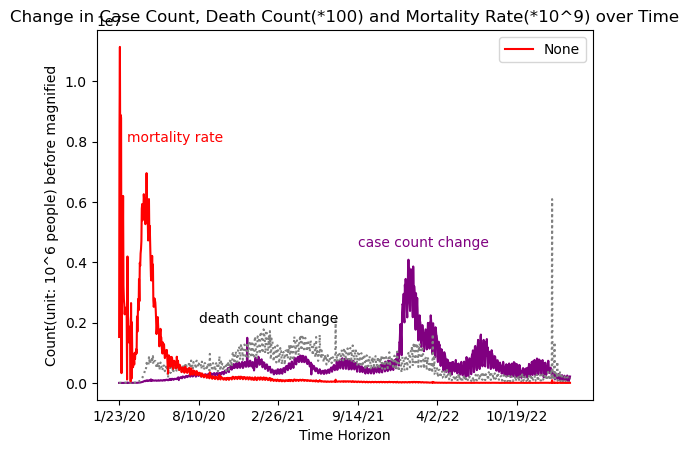

In [818]:
### plotting

# plotting
fig, ax = plt.subplots()

global_confirm_change.plot(ax=ax,legend=False,linestyle='-',color = 'purple')
ax.text(600,4500000,'case count change',color='purple')

global_death_change_magnified.plot(ax=ax,legend=False,linestyle='dotted',color = 'gray')
ax.text(200,2000000,'death count change',color='black')

seasonal_newcase_death_magnified.plot(ax=ax, legend=True, linestyle='solid',color = 'red')
ax.text(20,8000000,'mortality rate',color='red')


# set labels
ax.set_ylabel('Count(unit: 10^6 people) before magnified')
ax.set_xlabel('Time Horizon')
ax.set_title('Change in Case Count, Death Count(*100) and Mortality Rate(*10^9) over Time')

> To analyze the trend, the death count is magnified by 100, and the mortality rate is magnified by 1 ${\times}$ $10^{9}$. This is reasonable as we are multiplying the values by a constant coefficient, and if there exists a relation (which will be unchanged after the magnification due to the nature of constant multiplication), it will be easier to tell.

The X variables chosen to test the hypotheses are death count and case count (based on time), and the Y variable is the mortality rate.

The exact daily data is graphed above. We can tell the mortality rate fluctuation ends around 8/10/20, which is before any significant fluctuation in the death change and the case change starting from the midpoint of 8/10/20 and 2/26/21. As well as the peak of the mortality rate lies between 1/23/20 and 8/10/20, while the case count peak lies between 9/14/21 and 4/2/22, and there still exist significant fluctuations after the peak.

Due to the significant distribution difference between the two variables, we can conclude that **data shows no significant relation between case count and the mortality rate**.

This can be reasoned as many countries enforced lockdowns when the mortality rate is high, resulting in a low case count, and they will end the quarantine if and only if the mortality rate is stabilized by exogenous factors such as mass vaccinations or herd immunity. For example, the Ontario government announced the end of lockdown on Nov.20, 2020 $^{(2)}$, when the mortality rate ended its fluctuation. It would be reasonable for the confirmation count to rise after people gain back rights to outside activities as there exist more social interactions, resulting in more individuals and more ways to spread the virus.


However, when the mortality rate rises between 1/23/20 and 8/10/20, the death count also has a relatively sudden increase. As the mortality rate goes down, the death count also has a downfall before 8/10/20. Thus we conclude that **a rise in the death count rate will lead to an increase in the COVID-19 mortality rate; however, there exist other factors that can result in a more significant impact (on the mortality rate)**.

[clicke here to return to the outline.](#outline)

<br>

### Plot: Mortality Rate in Different Countries

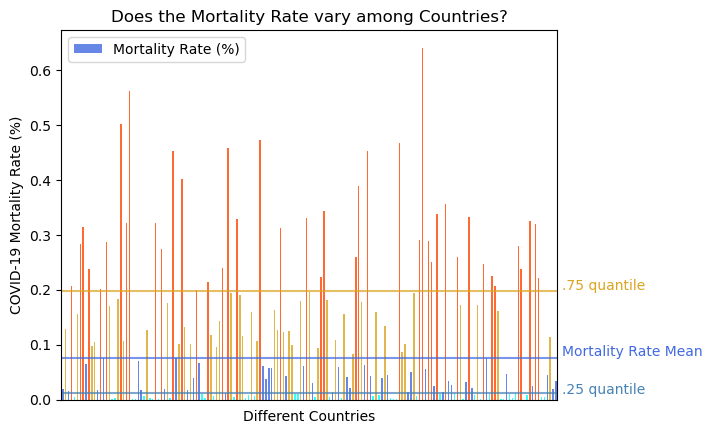

In [819]:
### plotting

# give barplot
fig, ax = plt.subplots()

# calculating quantiles
quantile25 = country_death_population['Mortality Rate (%)'].quantile(.25)
quantile50 = country_death_population['Mortality Rate (%)'].quantile(.50)
quantile75 = country_death_population['Mortality Rate (%)'].quantile(.75)

colors = ['aqua' if i<=quantile25 else 'royalblue' if i<=quantile50 else 'goldenrod' if i<=quantile75 else 'orangered' for i in country_death_population['Mortality Rate (%)']]
#colors = ['red' if i<=quantile25 else 'darkred' if i<=quantile50 else 'orangered' if i<=quantile75 else 'dodgerblue' for i in country_death_population['Mortality Rate (%)']]

country_death_population_plot = country_death_population.loc[:,['Country/Region','Mortality Rate (%)']]
mortality_mean = country_death_population_plot['Mortality Rate (%)'].mean()

country_death_population_plot.plot.bar(ax=ax,x='Country/Region', y='Mortality Rate (%)',alpha = 0.8, color=colors)

ax.set_ylabel('COVID-19 Mortality Rate (%)')
ax.set_xlabel('Different Countries')
ax.set_title('Does the Mortality Rate vary among Countries?')
ax.set_xticks([])

plt.axline(xy1=[0,quantile25],xy2=[100,quantile25],color='steelblue',alpha=0.7)
ax.text(172,0.01,'.25 quantile',color='steelblue')

plt.axline(xy1=[0,quantile50],xy2=[100,quantile50],color = 'royalblue',alpha = 0.7)
ax.text(172,0.08,'Mortality Rate Mean',color='royalblue')

plt.axline(xy1=[0,quantile75],xy2=[100,quantile75],color='goldenrod',alpha=0.7)
ax.text(172,0.2,'.75 quantile',color='goldenrod')
plt.show()

> Remember our goal is to determine **whether the mortality rate is differed among countries.**

The barplot above visualized the difference in mortality rates among countries, where the gray line in the middle is the mortality rate mean. The countries' names are removed as they are not necessary for the topic. We can see numerous countries below the mortality rate mean and there exist countries exceeding it significantly. This pattern is enough to answer our research question for this part.

We can see that the differentiation in mortality rate is massive; thus we can conclude that **the mortality rate does vary among different countries**. However, this still does not answer the research question -

**"But why?** Why do some countries have a large mortality rate while others can bring it down?"

For now, let us assume the epidemic is strongly related to the economic development of a nation.

Thus to further investigate this topic, let us ask another question: 

**"Does the individual wealth of a nation affect its COVID-19 mortality rate? If so, how?"**

Thus let us move further into the relation between **GDP per capita** and the **mortality rate**.

[clicke here to return to the outline.](#outline)

<br>

### Plot: the Relation between GDP per Capita and Mortality Rate

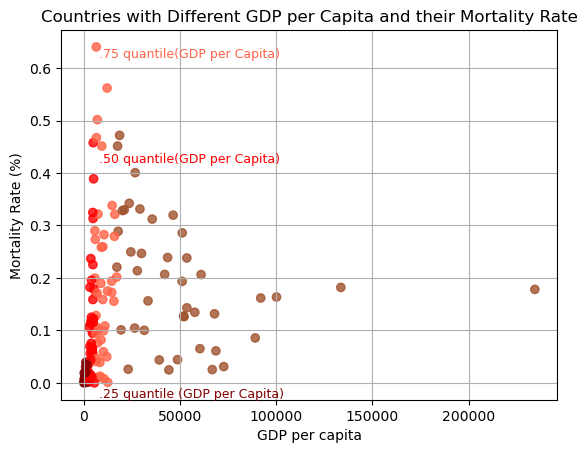

In [820]:
### give scatterplot

fig, ax = plt.subplots()

# GDP per capita quantiles
quantile25 = country_death_population_GDP['GDP per Capita'].quantile(.25)
quantile50 = country_death_population_GDP['GDP per Capita'].quantile(.50)
quantile75 = country_death_population_GDP['GDP per Capita'].quantile(.75)

colors = ['maroon' if i<quantile25 else 'red' if i<quantile50 else 'tomato' if i<quantile75 else 'sienna' for i in country_death_population_GDP['GDP per Capita']]
plt.scatter(x=country_death_population_GDP['GDP per Capita'], y=country_death_population_GDP['Mortality Rate (%)'], color=colors,alpha=0.8)

ax.grid(True)
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Mortality Rate (%)')
ax.text(8000,0.62,'.75 quantile(GDP per Capita)',color='tomato', size=9)
ax.text(8000,0.42,'.50 quantile(GDP per Capita)',color='red', size=9)
ax.text(8000,-0.028,'.25 quantile (GDP per Capita)',color='maroon', size=9)

plt.title('Countries with Different GDP per Capita and their Mortality Rate')
plt.show()


The scatterplot above visualizes the mortality difference between countries with different GDP per capita. The GDP per capita quantiles are colored differently. From the graph, we can see that countries with a low GDP per capita tend to have a low mortality rate, and countries with medium GDP per capita tend to have the highest mortality rate with statistical outliners. Countries with high GDP per capita has a relatively stable mortality rate (with a relatively low variance), however, it is still greater than the countries with low GDP per capita.

Thus we can conclude **countries with low GDP per capita have the lowest mortality rate, then countries with the highest GDP per capita has the second lowest mortality rate,and countries with medium GDP per capita have the highest mortality rate.** This contridicts my initial assumption.

One way to explain this is that countries with medium GDP per capita are mainly developing countries, where people work the hardest (from my personal observation). Thus the people put less attention into health. On the other side, countries with low GDP per capita tend to have a more dictatored government where the citizens are banned from going out during the pandemic, resulting in a lower mortality rate.

[clicke here to return to the outline.](#outline)

<br>

### Plot: Omicron Proportion and Mortality Rate

(0.0, 0.6)

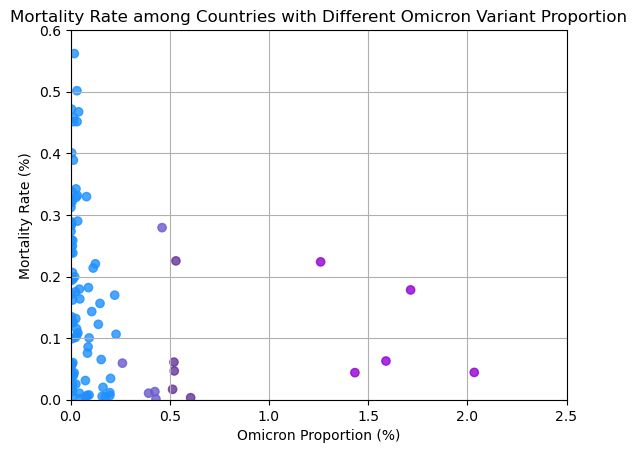

In [821]:
### plot

fig, ax = plt.subplots()

colors = ['dodgerblue' if i<0.25 else 'slateblue' if i<0.5 else 'rebeccapurple' if i<0.75 else 'darkviolet' for i in country_death_confirm_population['Omicron Prop (%)']]

plt.scatter(x = country_death_confirm_population['Omicron Prop (%)'], y = country_death_confirm_population['Mortality Rate (%)'], color = colors, alpha = 0.8)
ax.grid(True)
ax.set_xlabel('Omicron Proportion (%)')
ax.set_ylabel('Mortality Rate (%)')

plt.title('Mortality Rate among Countries with Different Omicron Variant Proportion')
plt.xlim(0,2.5)
plt.ylim(0,0.6)

For each individual observation (country), the x variable is the omicron proportion and the y variable is the mortality rate.

The graph above provides an inituitive relation between a country's mortality rate and its omicron proportion. We can tell the distribution is shaped similarly to a negative log function or *a typical exponential distribution*. This allows us to conclude.

From the data given above, we can conclude the relation between the country's omicron proportion and its mortality rate as: 

**Most countries have both a low omicron proportion and a low mortality rate. Countries with a high omicron proportion tend to have a low mortality rate, and countries with a low omicron proportion tend to have a high mortality rate.**

[clicke here to return to the outline.](#outline)

<br>


<br>



<br>


------
# **Project Two**

*$\color{gray}{\text{ "The role of economic factors regarding the variation in the COVID-19 mortality rate among countries." }}$*


So far, we have answered the following research questions in [project one](#project-one):

- [Do there exist similar trends between confirmation count and mortality rate? How about death count and mortality rate?](#project-one-COVID-19-mortality-rate,-confirmation-count-and-death-count)

- [Does mortality rate vary among countries?](#project-one-mortality-rate-in-different-countries)

- [What is the relation between GDP per capita and the COVID-19 mortality rate?](#project-one-the-relation-between-gdp-per-capita-and-mortality-rate)

- [Do countries with higher omicron variant proportion have a higher mortality rate?](#project-one-omicron-variant-proportion-and-the-mortality-rate)

*As a personal goal of this new project, I expect myself to write cleaner codes with improved efficiency.*

<br>

## **The Message**

As an answer to project one, we see economic factors such as GDP per capita does result variation in the mortality rate. For example, we have Peru with 665.53 mortality case over 100,000 population, yet we have Burudi with its COVID-19 mortality rate of 0.1% $^{(8)}$. Thus as this is an economic course, I wonder what other **economic factors** will result in the variation in COVID-19 mortality rate. Thus, let us further specify the initial research question into the main message of project two:

*$\color{blue}{\text{ "The role of economic factors regarding the variation in the COVID-19 mortality rate among countries." }}$*

As the message encodes, we are going to focus on the mortality change related to economic factors. The X-variables are the **economic factors** of a country and the Y-variable is the **mortality rate**. Moreover, we are going to specify the mortality rate in countries with high population and low population. Let us specify the message into the following sub-sections:

- [**The role of GDP regarding the mortality rate variation among countries**](#the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)

- [**The role of the governmental mode regarding the mortality rate variation among countries**](#the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)

- [**The role of literacy rate regarding the mortality rate variation among countries**](#the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

<br>

#### **The role of GDP regarding the mortality rate variation among countries**

We have research the role of **GDP per capita** with respect to the COVID-19 mortality rate in project one. The conclusion is:

*countries with low GDP per capita have the lowest mortality rate, then countries with the highest GDP per capita has the second lowest mortality rate,and countries with medium GDP per capita have the highest mortality rate.*

<br>

Thus as another well-known economic factor, project two will start by showing how does a country's **GDP** affect its COVID-19 mortality rate.

**Message**

*In countries with a large population, as the GDP increases the mortality rate tend to decrease. Its trendline is more inelastic than less populated countries', as well as it has more outliners in both GDP and mortality rate.*

*On the other hand, in countries with a small population, an GDP increases raises the mortality rate. Countries with a small population also tend to have both a lower mortality rate and a lower GDP.*

**Content**
- Data Cleaning: [here](#data-cleaning-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)
- Summary Statistics Table: [here](#summary-statistics-table-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)
- Plots: [here](#plots-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)

<br>

#### **The role of the governmental mode regarding the mortality rate variation among countries**

Governmental mode is an important categorical factor resulting in mortality rate variation among countries, as it determines essential quarantine policies directly. My personal experience also suggests me that in countries with a more dictatored government (China), the overall quarantine enforcement policy is much stricter than countries with a more democratic government. Thus with the *Democracy-Dictatorship index*, we found the relations between the governmental mode and the COVID-19 mortality rate in both the more populated countries and the less populated countries.

**Message**

*In countries with a higher population, parlimentary democracy governments minimize the mortality rate and military dictatorship governments maximize the mortality rate. On the other hand, in countries with a lower population, royal dictatorship governments minimize the mortality rate and civilian dictatorship governments maximize the mortality rate.*

**Content**
- Data Cleaning: [here](#data-cleaning-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)
- Summary Statistics Table: [here](#summary-statistics-table-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)
- Plot: [here](#plot-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)

<br>

#### **The role of literacy rate regarding the mortality rate variation among countries**

Another important economic factor regarding the mortality rate of a country is its **literacy rate**, as higher literacy rate is resulted by better public edcuation, which improves public health both directly through educating people and indirectly through having more medical staff.

**Message**
*Both high population countries and low population countries share a similar, decreasing trend, which is , an increase in the literacy rate decreases the mortality rate. However, the difference is not relatively significant.*

**Content**
- Data Cleaning: [here](#data-cleaning-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)
- Summary Statistics Table: [here](#summary-statistics-table-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)
- Plot: [here](#plots-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

<br>

-----
### Project Two: **Data Cleaning**

The data sets are loaded at the beginning [here](#data-set-loading).
The data sets we have now are:

- *global_confirm*: the global COVID-19 confirmation count data. 

- *global_death*: the global COVID-19 mortality count data.

- *population*: the global population data.

- *GDP*: the global gdp per capita data

- *variants*: the COVID-19 variant count data.

We are going to use some of these existing data sets and add more later. 

<br>

#### Data Cleaning: The role of GDP regarding the mortality rate variation among countries

In [822]:
# country_confirm: cumulative confirmation count data
country_confirm = global_confirm.loc[:,['Country/Region','2/28/23']]
country_confirm = country_confirm.rename({'Country/Region':'Country', '2/28/23':'Cumulative Confirmation'},axis=1).dropna()

# country_death: cumulative mortality case data
country_death = global_death.loc[:, ['Country/Region', '2/28/23']]
country_death = country_death.rename({'Country/Region':'Country', '2/28/23':'Cumulative Death'}, axis=1).dropna()

# merge two data sets to calculate the mortality rate
country_mortality_rate = pd.merge(country_confirm, country_death, on='Country', how='inner')
country_mortality_rate = country_mortality_rate.groupby('Country').sum()
country_mortality_rate['Mortality Rate (%)'] = (country_mortality_rate['Cumulative Death'] / country_mortality_rate['Cumulative Confirmation']) * 100

# merge data with population
population = population.rename({'Country/Region':'Country', '2022 [YR2022]':'Population'}, axis=1)
country_mortality_rate = pd.merge(country_mortality_rate, population, on='Country', how='inner')

# type conversion
country_mortality_rate['Population'] =  country_mortality_rate['Population'].astype(int)

Now we should get a data set that has the country name, cumulative confirmation count, cumulative mortality count and mortality rate based on it. Now let us merge it with the GDP data from the world bank.

##### Merge with GDP Data

In [823]:
# read the csv
country_GDP = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4898871.csv', on_bad_lines='skip')

# clean and merge
country_GDP = country_GDP.loc[:,['Country Name', '2021']].dropna().rename({'Country Name':'Country', '2021':'GDP'},axis=1)
country_MR_GDP = pd.merge(country_mortality_rate, country_GDP, on='Country', how='inner').dropna()

Now we should get *country_MR_GDP* as a data set with the following data:
- Country Name
- Cumulative Confirmation Count
- Cumulative Death Count
- Mortality Rate (in percentage %)
- Population
- GDP

Now let us move forward to the corresponding summary statistics table. [here](#summary-statistics-table-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)

<br>

Remember for this project that we have to group countries into high population and low population.

Let us first define what is a **"High population"**. 

As Google shows no credible resource on the answer, we have to define the standard. We first exclude countries with the top 10% population and the bottom 10% population (to stabilize the variance), and then take the mean, then round up to an int type.

In [824]:
# define the population standard
df = country_mortality_rate.sort_values('Population', ascending=False).reset_index(drop=True).iloc[17:170-17,:].reset_index(drop=True)
pop_standard = int(df['Population'].mean())
print(pop_standard)

14049687


Thus allows us to define the following terms for this project:

> $\color{red}{\text{High Population}}$: Countries with a population higher than 14049687 is considered high population, which is the mean for the data set population without the 10% edge values (no top 10% population & no bottom 10% population).

> $\color{red}{\text{Low Population}}$: Countries that are not considered to have a high population.

*Note: the top 10% and the bottom 10% are excluded only for population standard calculation. They are still a part of the data set.*

Let us move further to the summary statistics table for the role of GDP regarding the mortality rate variation among countries. [Here](#summary-statistics-table-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)

<br>

#### Data Cleaning: The role of the governmental mode regarding the mortality rate variation among countries

In [825]:
# load data sets
govt = pd.read_csv('Democracy-Dictatorship_Index.csv', on_bad_lines='skip')
country_codes = pd.read_csv('wikipedia-iso-country-codes.csv', on_bad_lines='skip')

Unfortunately, the dictatorship index data set is written in country codes. Thus we have to first merge it with the country code data set.

In [826]:
# loop population status among countries
for i in range(len(country_mortality_rate)):
    if int(country_mortality_rate.loc[i, 'Population']) >= pop_standard:
        country_mortality_rate.loc[i, 'Population Status'] = 'High'
    else:
        country_mortality_rate.loc[i, 'Population Status'] = 'Low'

# merge
df = pd.merge(govt, country_codes, left_on='Regime', right_on='Alpha-3 code', how='inner')

# select the columns necessary
if 'Regime' in df:
    df = df.loc[:, ['Type', 'Subtype', 'English short name lower case']]

# rearrange columns and rename
df = df[['English short name lower case', 'Type', 'Subtype']].rename(columns={'English short name lower case':'Country'})

# merge mortality rate data set with dictatorship index
country_MR_govt = pd.merge(country_mortality_rate, df, on='Country', how='inner')
country_MR_govt = country_MR_govt.rename(columns={'Type':'Governmental Type'})

# rearrange order and cut off
country_MR_govt = country_MR_govt[['Country', 'Population Status', 'Governmental Type', 'Subtype', 'Mortality Rate (%)']]

Now we have merged three data set to get what we want. 

The *country_MR_govt* data set contains info below:

- Country name
- Population status
- Governmental type
- Subtype
- Mortality Rate

Let us go to the summary statistics table [here](#summary-statistics-table-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries).

<br>

#### Data Cleaning: The role of literacy rate regarding the mortality rate variation among countries

In [827]:
# read the data set
LR = pd.read_csv('API_SE.ADT.LITR.ZS_DS2_en_csv_v2_4900230.csv', on_bad_lines='skip')
LR = LR.loc[:, ['Country Name', '2021']].dropna().reset_index(drop=True)

# merge the data sets
country_LR_MR = pd.merge(country_mortality_rate, LR, left_on='Country', right_on='Country Name', how='inner')
country_LR_MR = country_LR_MR[['Country', 'Population Status', 'Mortality Rate (%)', '2021']]
country_LR_MR = country_LR_MR.rename(columns={'2021':'Literacy Rate (%)'})

At this point, the *LR* data set, which stands for *Literacy Rate*, should contains the following information:

- Country name
- Population status
- Mortality rate
- Literacy rate

Let us visualize the statistics table [here](#summary-statistics-table-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries).

<br>

----
### Project Two: **Summary Statistics Table**

#### Summary Statistics Table: The role of GDP regarding the mortality rate variation among countries



In [828]:
# give top 15 grouped by GDP
df = country_MR_GDP.head(15).sort_values('GDP',ascending=False).reset_index(drop=True)

# query the data to see if they are over the population standard
for i in range(len(df)):
    if int(df.loc[i,'Population']) >= pop_standard:
        df.loc[i, 'Population Status'] = 'High'
    else:
        df.loc[i, 'Population Status'] = 'Low'

# define coloring function for population status
def coloring_population_status(val):
    """Color the population status. Color it lightcoral if High, color it palegreen if low.
    """
    if val == 'High':
        color = 'lightcoral'
    elif val == 'Low':
        color = 'palegreen'
    else:
        color = None
    return 'background-color: %s' % color

# reorder and styling
df = df[['Country', 'Population Status', 'Population', 'GDP', 'Mortality Rate (%)', 'Cumulative Confirmation', 'Cumulative Death']]
df = df.sort_values('Population Status').reset_index(drop=True).rename(columns={'GDP': 'GDP (descending)'})
df.style.applymap(coloring_population_status).set_caption('Table: Country, their Mortality Rate and their GDP (ordered by their GDP)')

,Country,Population Status,Population,GDP (descending),Mortality Rate (%),Cumulative Confirmation,Cumulative Death
0,Australia,High,25941598,1552667363236.060059,0.170442,90930888,154984
1,Argentina,High,46050112,487227339102.669983,1.298899,10044125,130463
2,Bangladesh,High,171186372,416264942893.325989,1.444960,2037773,29445
3,Algeria,High,44903225,163044443983.759003,2.534989,271441,6881
4,Angola,High,35588987,67404287260.319901,1.836492,105255,1933
5,Afghanistan,High,41128771,14786861638.453501,3.772179,209322,7896
6,Austria,Low,8970982,480368403893.364014,0.370257,5911294,21887
7,Belarus,Low,9314187,68205380706.660896,0.716070,994037,7118
8,Azerbaijan,Low,10195707,54622176470.588203,1.221293,828548,10119
9,Bahrain,Low,1472233,38868663031.914902,0.218805,707480,1548


We rearranged the order of *country_MR_GDP* data set for a better visual experience (ordered by their GDP descending). The population status are in differrent color. 

The table above gives country and their corresponding mortality rate and GDP. **In countries with a high population**, we can see countries with high GDP such as Australia having a lower mortality rate; vice versa, countries with a lower GDP such as Afghanistan and Angola tend to have a higher mortality rate. 

However, the trend becomes more complicated **in countries with a low population**. We can see several fluctuation through the table. For instance, we see a increasing trend from Austria to Azerbaijan, then a sudden drop and a decreasing trend at Bahrain. Then another sudden increase at Armenia, and then another drop and another sudden increase.

To ensure the precision, let us move further into the plot section. [Here](#plot-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)

<br>

#### Summary Statistics Table: The role of the governmental mode regarding the mortality rate variation among countries

In [829]:
# define coloring module for governmental mode
def coloring_govt_status(val):
    """Color the population status. Color it lightcoral if High, color it palegreen if low.
    """
    if val == 'Dictatorship':
        color = 'lightsalmon'
    elif val == 'Democracy':
        color = 'cyan'
    else:
        color = None
    return 'background-color: %s' % color

# reorder
df = country_MR_govt.head(15).sort_values(['Population Status', 'Governmental Type']).reset_index(drop=True)

# calculate the mortality rate mean for each group
for i in range(len(df)):
    if (df.loc[i, 'Population Status']=='High') & (df.loc[i, 'Governmental Type']=='Democracy'):
        df.loc[i, ['Mortality Rate Mean (%)']] = country_MR_govt[(country_MR_govt['Population Status']=='High') & (country_MR_govt['Governmental Type']=='Democracy')]['Mortality Rate (%)'].mean()
    elif (df.loc[i, 'Population Status']=='High') & (df.loc[i, 'Governmental Type']=='Dictatorship'):
        df.loc[i, ['Mortality Rate Mean (%)']] = country_MR_govt[(country_MR_govt['Population Status']=='High') & (country_MR_govt['Governmental Type']=='Dictatorship')]['Mortality Rate (%)'].mean()
    elif (df.loc[i, 'Population Status']=='Low') & (df.loc[i, 'Governmental Type']=='Democracy'):
        df.loc[i, ['Mortality Rate Mean (%)']] = country_MR_govt[(country_MR_govt['Population Status']=='Low') & (country_MR_govt['Governmental Type']=='Democracy')]['Mortality Rate (%)'].mean()
    else:
        df.loc[i, ['Mortality Rate Mean (%)']] = country_MR_govt[(country_MR_govt['Population Status']=='Low') & (country_MR_govt['Governmental Type']=='Dictatorship')]['Mortality Rate (%)'].mean()

# styling and coloring
df.style.applymap(coloring_govt_status).applymap(coloring_population_status).set_caption('Table: Country, their Mortality Rate and their Governmental Mode')

,Country,Population Status,Governmental Type,Subtype,Mortality Rate (%),Mortality Rate Mean (%)
0,Argentina,High,Democracy,Presidential Democracy,1.298899,1.723839
1,Australia,High,Democracy,Parliamentary Democracy,0.170442,1.723839
2,Afghanistan,High,Dictatorship,Civilian Dictatorship,3.772179,2.064609
3,Algeria,High,Dictatorship,Civilian Dictatorship,2.534989,2.064609
4,Angola,High,Dictatorship,Civilian Dictatorship,1.836492,2.064609
5,Bangladesh,High,Dictatorship,Civilian Dictatorship,1.444960,2.064609
6,Albania,Low,Democracy,Parliamentary Democracy,1.075986,0.914527
7,Andorra,Low,Democracy,Parliamentary Democracy,0.344712,0.914527
8,Antigua and Barbuda,Low,Democracy,Parliamentary Democracy,1.603338,0.914527
9,Armenia,Low,Democracy,Semi-Presidential Democracy,1.951797,0.914527


The table above shows the mortality rate variation between countries with different **population status** and different **governmental type**.

> Note that the **mortality rate mean (%)** is calculated with the whole data set, not the first 15 shown on the table.

We can see that among the first 15 countries, the dictatorial government count is similar to the democratic government count. **In countries with a high population**, the ones ruled under democratic governments have a lower mortality rate overly. **In countries with a low population**, the democratic governments tend to have a lower mortality rate too. However, the mortality rate mean difference is smaller in countries with a lower population.

Moreover, let us move into the subtype of the government mode and see their effect on the mortality rate.

Let us move on to the graph. [Here](#plot-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)

<br>

#### Summary Statistics Table: The role of literacy rate regarding the mortality rate variation among countries

In [830]:
# select one observation from each literacy rate level with an interval of 5
df = country_LR_MR.sort_values('Literacy Rate (%)').reset_index(drop=True).iloc[[0,5,10,15,20,25,30,35,40,45,50,55,60],:]

# coloring and styling
df.style.applymap(coloring_population_status).set_caption('Table: Countries from each Literacy Level and their Mortality Rate')

,Country,Population Status,Mortality Rate (%),Literacy Rate (%)
0,Chad,High,2.526700,26.760000
5,Burkina Faso,High,1.795430,46.040001
10,Mozambique,High,0.961827,63.419998
15,Angola,High,1.836492,72.279999
20,Uganda,High,2.128982,79.000000
25,Guatemala,High,1.631584,83.349998
30,Zimbabwe,High,2.145718,89.699997
35,Thailand,High,0.717232,94.099998
40,Dominican Republic,Low,0.663706,95.169998
45,Bosnia and Herzegovina,Low,4.053539,98.099998


We reordered the graph by literacy rate ascending for a better visual experience above. We selected one observation from each literacy rate level with an interval of 5.

From the table, we can tell that countries with a low literacy rate tend to have a higher population, and countries with a higher literacy rate tend to have a lower population. However, we see no clear trend from the table between mortality rate and literacy rate for both high population and low population as there exist too much fluctuation.

Let us move further to the plot. [Here](#plot-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

<br>

-----
### Project Two: **Plots**

#### Plots: The role of GDP regarding the mortality rate variation among countries

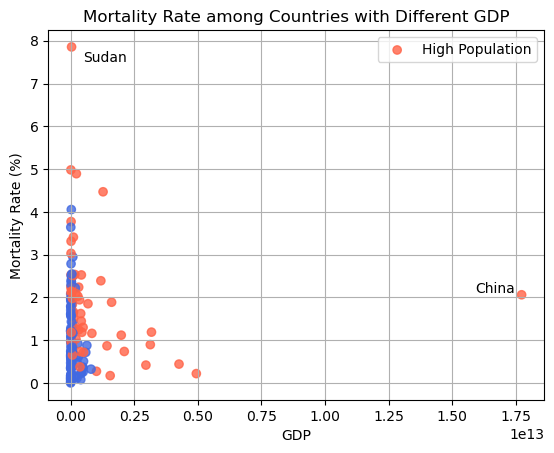

In [831]:
# define population status for the entire data set
for i in range(len(country_MR_GDP)):
    if int(country_MR_GDP.loc[i,'Population']) >= pop_standard:
        country_MR_GDP.loc[i, 'Population Status'] = 'High'
    else:
        country_MR_GDP.loc[i, 'Population Status'] = 'Low'

# plotting
fig, ax = plt.subplots()
colors = ['tomato' if i=='High' else 'royalblue' for i in country_MR_GDP['Population Status']]
plt.scatter(x=country_MR_GDP['GDP'], y=country_MR_GDP['Mortality Rate (%)'],color=colors,alpha=0.8)
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('GDP')
plt.title('Mortality Rate among Countries with Different GDP')
ax.text(15900000000000,2.1,'China')
ax.text(500000000000, 7.5, 'Sudan')
ax.legend(['High Population'])
plt.autoscale()
plt.show()

Before we set the limit, we can see **countries with high population** has two outliner:

- China, with its extreme high GDP,

and 

- Sudan, with its extreme high mortality rate.

The outliners are making the graph too compact. Let us now set limits for the graph and find the trend.

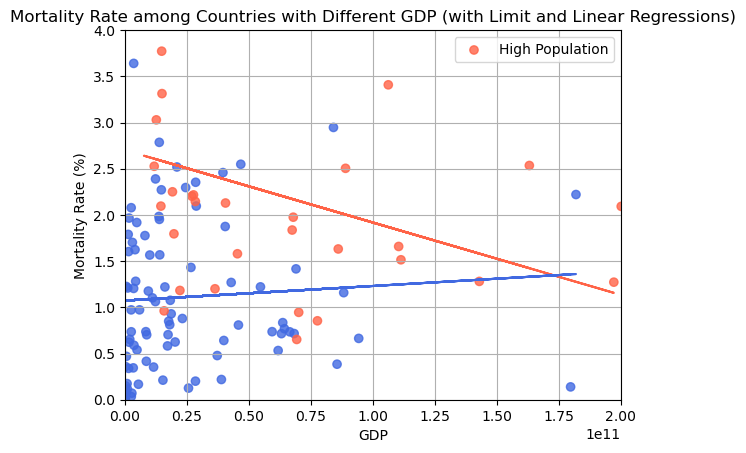

In [832]:
# define population status for the entire data set
for i in range(len(country_MR_GDP)):
    if int(country_MR_GDP.loc[i,'Population']) >= pop_standard:
        country_MR_GDP.loc[i, 'Population Status'] = 'High'
    else:
        country_MR_GDP.loc[i, 'Population Status'] = 'Low'

# plotting
fig, ax = plt.subplots()
colors = ['tomato' if i=='High' else 'royalblue' for i in country_MR_GDP['Population Status']]
plt.scatter(x=country_MR_GDP['GDP'], y=country_MR_GDP['Mortality Rate (%)'],color=colors,alpha=0.8)
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('GDP')
ax.legend(['High Population'])

# limits go here
xlim = 200000000000
ylim = 4
ax.set_xlim(0,xlim)
ax.set_ylim(0,ylim)

# linear regreesion for high population
df_high = country_MR_GDP[(country_MR_GDP['GDP']<=xlim) & (country_MR_GDP['Population Status']=='High')]
coef_high = np.polyfit(df_high['GDP'],df_high['Mortality Rate (%)'],1)
poly1d_fn_high = np.poly1d(coef_high) 
plt.plot(df_high['GDP'], poly1d_fn_high(df_high['GDP']), color = 'tomato')

# linear regression for low population
df_low = country_MR_GDP[(country_MR_GDP['GDP']<=xlim) & (country_MR_GDP['Population Status']=='Low')]
coef_low = np.polyfit(df_low['GDP'],df_low['Mortality Rate (%)'],1)
poly1d_fn_low = np.poly1d(coef_low) 
plt.plot(df_low['GDP'], poly1d_fn_low(df_low['GDP']), color = 'royalblue')

# set title
plt.title('Mortality Rate among Countries with Different GDP (with Limit and Linear Regressions)')
plt.show()

Let us first recall the definition of mortality rate from project one:

> $\color{red}{\text{ COVID-19 Mortality Rate of a Country}}$: the estimated probability *(sampled from the population)* that a COVID-19-infected individual will result in disease-related mortality in a country.

or, in plain language:

> $\color{red}{\text{ COVID-19 Mortality Rate of a Country (Plain)}}$: "if I am sick in this country, by probability will I die from it?"

The graph above excludes the extreme values and take linear regression for both high population and low population countries **automatically**. Feel free to download the .jpynb version from GitHub here and play around with it (line 17).

> GitHub: https://github.com/robinasaki/Analyzing-the-COVID-19-Mortality-Rate-with-respect-to-Different-Variables.git

The graph allows to conclude that in most countries, **in countries with a high population**, as the GDP increases the mortality rate tend to decrease. Vice versa, **in countries with a low population**, an GDP increases raises the mortality rate. The trendline in high population countries is more inelastic than low population countries'.

Moreover, countries with a low population tend to have **a lower average mortality rate** and **a lower average GDP** than countries with high population. These observations make sense as less populated countries have less labour force, resulting in a lower domestic output. Combine with the trend, a lowered GDP brings a lowered mortality rate.

Don't forget our observation from the graph before the limit: **more populated countries also tend to have more outliner in GDP and mortality rate**.

<br>

#### Plot: The role of the governmental mode regarding the mortality rate variation among countries

In [833]:
# high population countries
H_CivilianDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                         (country_MR_govt['Subtype']=='Civilian Dictatorship')]['Mortality Rate (%)'].mean()
H_MilitaryDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                         (country_MR_govt['Subtype']=='Military Dictatorship')]['Mortality Rate (%)'].mean()
H_ParliamentaryDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                           (country_MR_govt['Subtype']=='Parliamentary Democracy')]['Mortality Rate (%)'].mean()
H_PresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                          (country_MR_govt['Subtype']=='Presidential Democracy')]['Mortality Rate (%)'].mean()
H_RoyalDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                      (country_MR_govt['Subtype']=='Royal Dictatorship')]['Mortality Rate (%)'].mean()
H_SemiPresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                              (country_MR_govt['Subtype']=='Semi-Presidential Democracy')]['Mortality Rate (%)'].mean()

# low population countries
L_CivilianDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                         (country_MR_govt['Subtype']=='Civilian Dictatorship')]['Mortality Rate (%)'].mean()
L_MilitaryDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                         (country_MR_govt['Subtype']=='Military Dictatorship')]['Mortality Rate (%)'].mean()
L_ParliamentaryDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                           (country_MR_govt['Subtype']=='Parliamentary Democracy')]['Mortality Rate (%)'].mean()
L_PresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                          (country_MR_govt['Subtype']=='Presidential Democracy')]['Mortality Rate (%)'].mean()
L_RoyalDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                      (country_MR_govt['Subtype']=='Royal Dictatorship')]['Mortality Rate (%)'].mean()
L_SemiPresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                              (country_MR_govt['Subtype']=='Semi-Presidential Democracy')]['Mortality Rate (%)'].mean()

# create a new DataFrame to store the data
subtype_govt = pd.DataFrame({
    'Civilian Dictatorship': [H_CivilianDictatorship, L_CivilianDictatorship],
    'Military Dictatorship': [H_MilitaryDictatorship, L_MilitaryDictatorship],
    'Parliamentary Democracy': [H_ParliamentaryDemocracy, L_ParliamentaryDemocracy],
    'Presidential Democracy': [H_PresidentialDemocracy, L_PresidentialDemocracy],
    'Royal Dictatorship': [H_RoyalDictatorship, L_RoyalDictatorship],
    'Semi-Presidential Democracy': [H_SemiPresidentialDemocracy, L_SemiPresidentialDemocracy]
}, index = ['High Population', 'Low Population']
)

# calculate the mean for both population status
high_mean = subtype_govt.loc['High Population',:].mean()
low_mean = subtype_govt.loc['Low Population',:].mean()

This should give us a DataFrame that gives the mortality rate mean of each government subtype. Now let us plot the graph for both **low population** and **high population** to compare the difference.

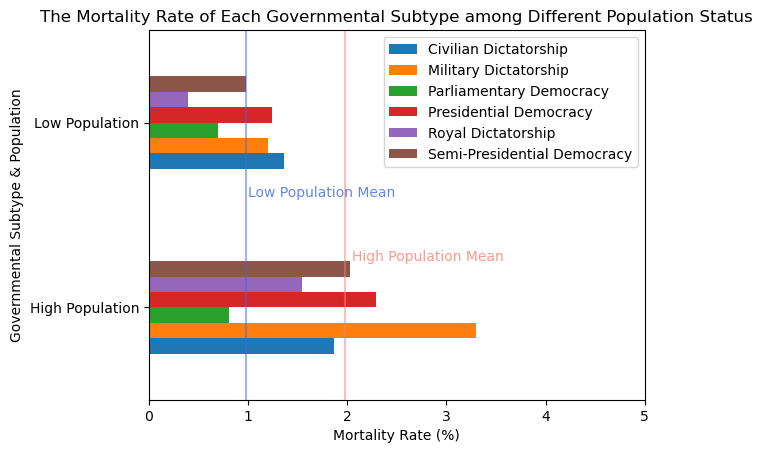

In [834]:
# plotting
fig, ax = plt.subplots()
subtype_govt.plot.barh(ax=ax)
ax.set_xlim(0,5)
plt.title('The Mortality Rate of Each Governmental Subtype among Different Population Status')
ax.set_xlabel('Mortality Rate (%)')
ax.set_ylabel('Governmental Subtype & Population')

# plot the mean for each population
plt.axline(xy1=[high_mean,0],xy2=[high_mean,2],color='salmon', alpha=0.5)
plt.axline(xy1=[low_mean,0], xy2=[low_mean,2], color='royalblue', alpha=0.5)
ax.text(2.05,0.25,'High Population Mean', color='salmon', alpha=0.8)
ax.text(1,0.6,'Low Population Mean', color='royalblue', alpha=0.8)
plt.show()

The graph above gives the mortality rate mean among different governmental subtypes of different population. From the graph, we can tell that **in countries with a lower population**, the **royal dictatorship** governmental mode results in the lowest mortality rate and **civilian dictatorship** governments brings the highest mortality rate. **In countries with a higher population**, the **parlimentary democracy** governments minimize the mortality rate and the highest mortality rates are resulted by **military dictatorship** governments. Moreover, we see that countries with a higher population has a higher overall mortality rate mean than countries with a lower population.

<br>

#### Plots: The role of literacy rate regarding the mortality rate variation among countries

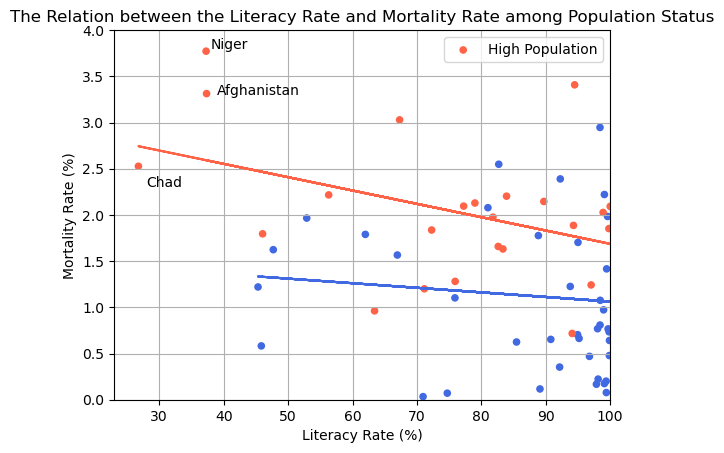

In [835]:
# plotting
fig, ax = plt.subplots()
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('Literacy Rate (%)')

# coloring and plotting
colors = ['tomato' if i=='High' else 'royalblue' for i in country_LR_MR['Population Status']]
country_LR_MR.plot.scatter(ax=ax, x='Literacy Rate (%)', y='Mortality Rate (%)', color=colors)

# limits go here
ax.set_xlim(23,100)
ax.set_ylim(0,4)

# linear regreesion for high population
df_high = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='High')]
coef_high = np.polyfit(df_high['Literacy Rate (%)'],df_high['Mortality Rate (%)'],1)
poly1d_fn_high = np.poly1d(coef_high) 
plt.plot(df_high['Literacy Rate (%)'], poly1d_fn_high(df_high['Literacy Rate (%)']), color = 'tomato')

# linear regression for low population
df_low = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='Low')]
coef_low = np.polyfit(df_low['Literacy Rate (%)'],df_low['Mortality Rate (%)'],1)
poly1d_fn_low = np.poly1d(coef_low) 
plt.plot(df_low['Literacy Rate (%)'], poly1d_fn_low(df_low['Literacy Rate (%)']), color = 'royalblue')

# styling
plt.grid(True)
ax.legend(['High Population'])
ax.text(28, 2.3, 'Chad')
ax.text(38, 3.8, 'Niger')
ax.text(39, 3.3, 'Afghanistan')
plt.title('The Relation between the Literacy Rate and Mortality Rate among Population Status')
plt.show()

> The lower bound of the X-axis is set to be 23 as there is no country with a literacy rate below 23.

With the current X interval and Y interval, we see a *relative* similar trend between the literacy rate and mortality rate among two population status. However, we do see **countries with high population** having more outliner in the literacy rate. For example, we can see Chad with its literacy rate of 26.76% and a mortality rate of 2.5267% at the very left side of the plot. However, let us modify the x_lim and the y_lim to move further into the distribution hotspot, to further analyze the trend.

<br>

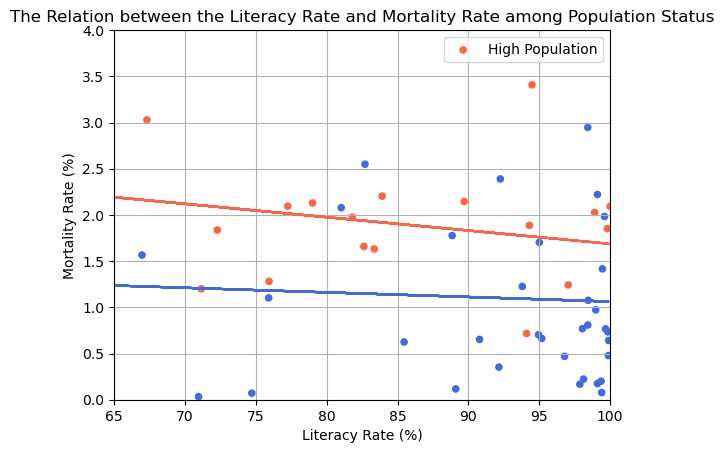

In [836]:
# plotting
fig, ax = plt.subplots()
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('Literacy Rate (%)')

# coloring and plotting
colors = ['tomato' if i=='High' else 'royalblue' for i in country_LR_MR['Population Status']]
country_LR_MR.plot.scatter(ax=ax, x='Literacy Rate (%)', y='Mortality Rate (%)', color=colors)

# limits go here
ax.set_xlim(65,100)
ax.set_ylim(0,4)

# linear regreesion for high population
df_high = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='High')]
coef_high = np.polyfit(df_high['Literacy Rate (%)'],df_high['Mortality Rate (%)'],1)
poly1d_fn_high = np.poly1d(coef_high) 
plt.plot(df_high['Literacy Rate (%)'], poly1d_fn_high(df_high['Literacy Rate (%)']), color = 'tomato')

# linear regression for low population
df_low = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='Low')]
coef_low = np.polyfit(df_low['Literacy Rate (%)'],df_low['Mortality Rate (%)'],1)
poly1d_fn_low = np.poly1d(coef_low) 
plt.plot(df_low['Literacy Rate (%)'], poly1d_fn_low(df_low['Literacy Rate (%)']), color = 'royalblue')

# styling
plt.grid(True)
ax.legend(['High Population'])
plt.title('The Relation between the Literacy Rate and Mortality Rate among Population Status')
plt.show()

The graph above includes linear regression automation for both population status. Feel free to download the .jpynb version from GitHub here and play around with it (line 17).

> GitHub: https://github.com/robinasaki/Analyzing-the-COVID-19-Mortality-Rate-with-respect-to-Different-Variables.git

After moving into the distribution hotspot, the trendlines of both **high population** and **low population** remain relatively similar. Thus, we conclude that countries with a high population shares a same decreasing trend with countries with a low population, which is an increase in the literacy rate decreases the mortality rate, however, the difference is not relatively significant.

This is reasonable as a higher literacy rate implies a better public education, which leads to a better overall public health thus decrease the mortality rate.

<br>

-----
## Maps and Interpretations

In this section, we are going to focus on the message 

*$\color{blue}{\text{ "The role of GDP regarding the variation in the COVID-19 mortality rate among countries." }}$*

We select this as the previous plots show interesting linear regressions between the variables among subgroups. 

Before we get into the detailed mapping, let us get a convenient data set. Let us begin with reading the csv.

In [837]:
# read the population csv
pop = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')

Then, let us merge it with the other data sets.

#### Merge

In order to get our target data set for mapping, we will merge the following data sets into one:

- confirmation count data
- mortality count data
- GDP data
- population
- more precise location data

> Note: The **Y-variable** (Mortality Rate) is calculated based on the first two data set.

We have merged the data sets in the previous section. However, since both the confirm count data and the mortality count data updates daily, we have to merge again here.

In [850]:
# confirmation count data
confirm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirm = confirm.loc[:, ['Country/Region', 'Lat', 'Long', '3/1/23']].groupby('Country/Region').sum()
confirm = confirm.rename(columns={'3/1/23': 'Cumulative Confirm'}).dropna()

# mortality count data
death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
death = death.loc[:, ['Country/Region', '3/1/23']].groupby('Country/Region').sum()
death = death.rename(columns={'3/1/23': 'Cumulative Death'}).dropna()

# GDP data
gdp_country = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4898871.csv')
gdp_country = gdp_country.loc[:, ['Country Name', '2021']].rename(columns={'Country Name':'Country', '2021':'GDP'}).dropna()

# location data 
location = pd.read_csv('https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv')
location = location.loc[:, ['Country', 'Latitude', 'Longitude']]

# re-read the file to make sure there is no bug everytime we run this chunk
pop = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')
pop = pop.loc[:, ['Country Name', '2021 [YR2021]']]
pop = pop.rename(columns={'Country Name': 'Country', '2021 [YR2021]': 'Population'}).dropna()

# let us begin to merge
df = pd.merge(confirm, death, on='Country/Region', how='inner')
df = pd.merge(df, gdp_country, left_on='Country/Region', right_on='Country', how='inner')
df = pd.merge(df, pop, left_on='Country', right_on='Country', how='inner')
df = pd.merge(df, location, left_on='Country', right_on='Country', how='inner')

# calculate the Y-variable
df['Mortality Rate (%)'] = (df['Cumulative Death'] / df['Cumulative Confirm']) * 100

# calculate the population status (defined before)
for i in range(len(df)):
    if int(df.loc[i,'Population']) >= pop_standard:
        df.loc[i, 'Population Status'] = 'High'
    else:
        df.loc[i, 'Population Status'] = 'Low'

mapping = df[['Country', 'Longitude', 'Latitude', 'Population Status', 'Mortality Rate (%)', 'GDP', 'Population', 'Cumulative Confirm', 'Cumulative Death']]
mapping = mapping.rename(columns={'Latitude':'Lat', 'Longitude':'Long'})

The *mapping* data set above should be the target mapping data set which incldues the following:

- Country name
- Latitude and longitude
- Population status (defined before)    <- **Y-variable subgroup standard**
- Mortality rate (in percentage %)   <- **Y-variable**
- GDP
- Population
- Cumulative confirm count and cumulative death count

However, due to some reason, the global confirmation count and global death count data sets do not have the US included. Let us add the US data mannually.

In [853]:
df = pd.DataFrame([['United States of America', 38, -97, 'High', 1.09087, 23320000000000, 331900000, 103000000, 1130000]], columns=['Country', 'Lat', 'Long', 'Population Status', 'Mortality Rate (%)', 'GDP', 'Population', 'Cumulative Confirm', 'Cumulative Death'])
if len(mapping) == 155:
    mapping = mapping.append(df).reset_index(drop=True)
    
# Long and Lat will be zipped and converted in the upcoming section

Now we have all the data for USA. Let us move further.

<br>

Let us first plot a distribution map for countries with the top GDP.

#### Map: Countries with High GDP

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_24544/2313479692.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  gdf2 = gdf.dropna(0).sort_values('GDP', ascending=False).head(num)


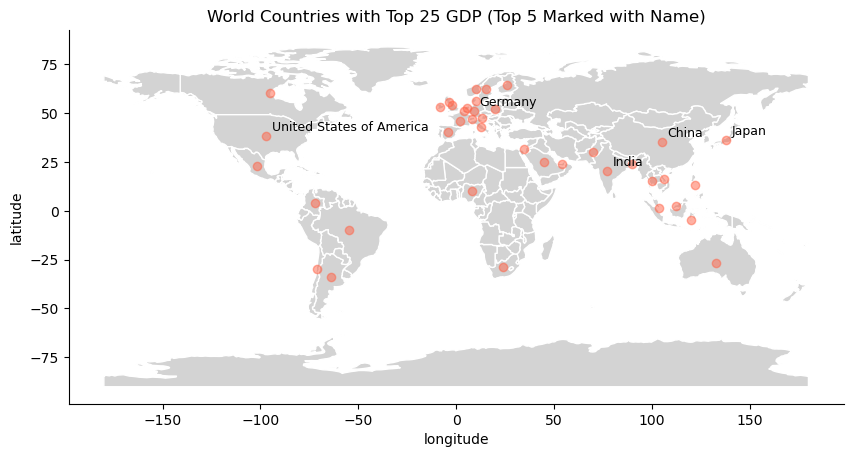

In [840]:
# copy the mapping data 
df = mapping.copy()

# read the world data and setting up the GeoDataFrame
quantile = mapping['GDP'].quantile(.75)
df = df[df['GDP'] >= quantile]
df.at[190,'Lat'] = 55.3781
df.at[190,'Long'] = -3.4360
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
df['Coordinates'] = list(zip(df.Long, df.Lat))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

# plotting 
fig, gax = plt.subplots(figsize = (10,8))
world.plot(ax=gax, edgecolor='white',color='lightgray')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gdf.plot(ax=gax, color='tomato', alpha=0.5)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('World Countries with Top 25 GDP (Top 5 Marked with Name)')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# naming the top 5 GPD
num = 5
gdf2 = gdf.dropna(0).sort_values('GDP', ascending=False).head(num)
for x, y, label in zip(gdf2['Coordinates'].x, gdf2['Coordinates'].y, gdf2['Country']):
   gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points', color = 'black', size = 9)

We can see countries with top 25 GDP are mostly distributed in **North America, Europe and Oceania**. There are also a significant numbers of top GDP countries in **South America**, **Southeast Asia** and **Middle East**. However, among the list of top five GDP, three of them are Asian countries. Then, let us move to find the mortality rate distribution around the globe to find the connection between the variables.

<br>

#### Map: Mortality Rate Distribution Color Map with High GDP Countries

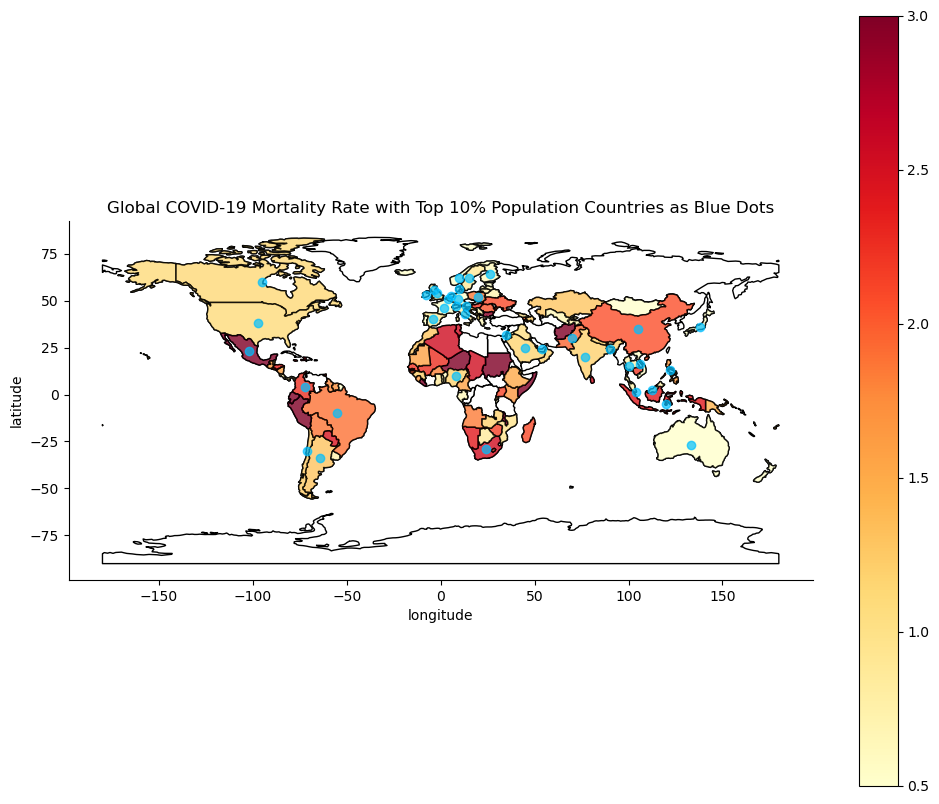

In [841]:
# setting up the GeoDataFrame
df = mapping.copy()
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
geodf = world.merge(df, left_on = 'name', right_on = 'Country', how = 'inner')

# plotting
fig, gax = plt.subplots(figsize = (12,10))
world.plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
geodf.plot(
    ax=gax, edgecolor='black', column='Mortality Rate (%)', legend=True, cmap='YlOrRd', alpha=0.8,
    vmin=0.5, vmax=3
)
gax.set_title('Global COVID-19 Mortality Rate with Top 10% Population Countries as Blue Dots')

# adding points
gdf.plot(ax=gax, color='deepskyblue', alpha=0.7)
plt.show()

The color map above shows the **mortality rate distribution** between countries, with countries with top 25 GDP colored in blue dot. We can tell that **in North America**, three major countries (Canada, USA, Mexico) have different COVID-19 mortality rate severity. The mortality rate is relatively lower in the upper part of North America, and is mainly resulted from the governmental mode and population density instead of GDP difference. Thus **in North America**, we see no significant correlation between the GDP and the COVID-19 mortality rate.

Compare to North America, South America tend to have a higher overall mortality rate. However, in South America, countries with a high GDP tend to have a lower mortality rate compare to countries like Peru and Ecuador. Thus **in South America**, countries with high GDP tend to have a lower COVID-19 mortality rate, and tend to not be a mortality hotspot.

Overall, **European** countries tend to have a high GDP and a low mortality rate. Because there are no visible countries with a high mortality rate, we cannot conclude the trend. Thus we can jsut take "overall, European countries tend to have a high GDP and a low mortality rate" as a conclusion.

Things start to turn bad in **Africa**, this continent contains many mortality rate hotspot with fewer high GDP countries. The mortality rate variation is higher than any other continent, and although high GDP countries in Africa tend to have a lower mortality rate compare to the hotspots, they still have a high mortality rate compare to the rest of the world.

**Asia** is another continent with a high variance. We can see Thailand and Vietnam with their lower mortality rate, and countries such as China and Indonesia with their higher mortality rate. However, the overall mortality rate is lower in regions such as Middle East and Russia. Thus in Asia, we see no clear trend between the GDP and the COVID-19 mortality rate except in Middle East, where countries with a higher GDP tend to have a greater mortality rate.

**Oceania** tend to have both a high GDP and a low mortality rate. As it contains only few countries, we cannot conclude the inter-country trend between the variables.

<br>

#### Map: Mortality Rate Distribution Discrete Color Map with Low GDP Countries

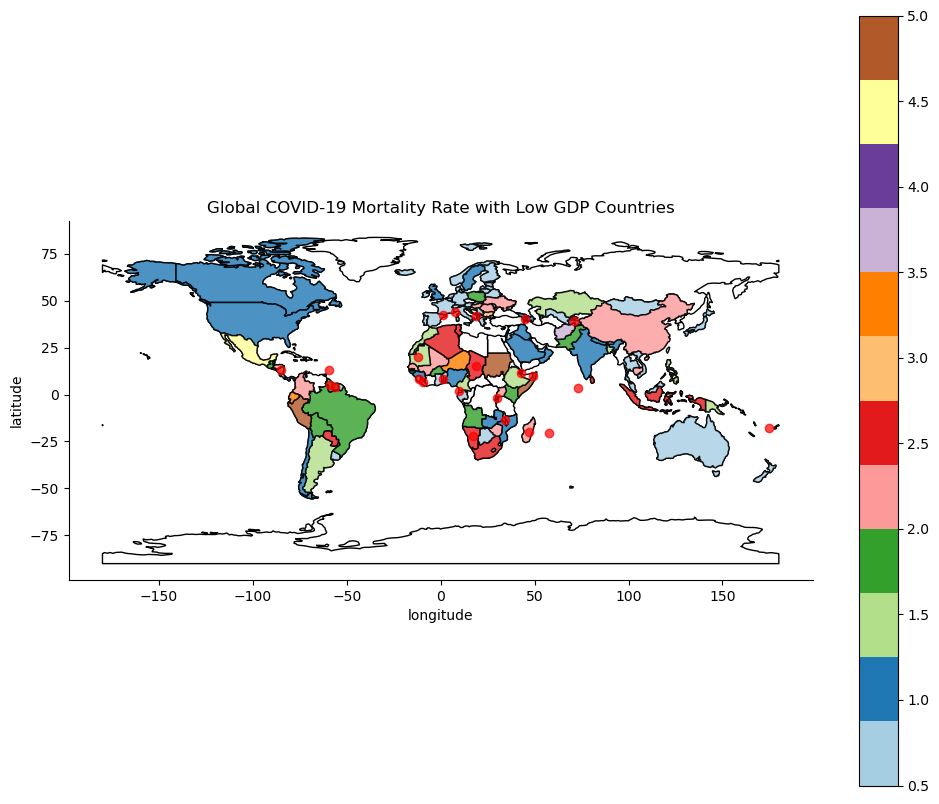

In [887]:
# setting up the GeoDataFrame
df = mapping.copy()
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
geodf = world.merge(df, left_on = 'name', right_on = 'Country', how = 'inner')

# plotting
fig, gax = plt.subplots(figsize = (12,10))
world.plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
geodf.plot(
    ax=gax, edgecolor='black', column='Mortality Rate (%)', legend=True, cmap='Paired', alpha=0.8,
    vmin=0.5, vmax=5
)
gax.set_title('Global COVID-19 Mortality Rate with Low GDP Countries')

# adding points
bottom_GDP_25 = mapping.sort_values('GDP').head(45)
bottom_GDP_25['Coordinates'] = list(zip(bottom_GDP_25.Long, bottom_GDP_25.Lat))
bottom_GDP_25['Coordinates'] = bottom_GDP_25['Coordinates'].apply(Point)
# drop the lowest 15 as they are not visible on the map (countries that are too small to see)
bottom_GDP_25 = bottom_GDP_25.sort_values('GDP').reset_index(drop=True).drop(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]).reset_index(drop=True)
bottom_GDP_25 = bottom_GDP_25.head(25)
gdf_b25 = gpd.GeoDataFrame(bottom_GDP_25, geometry="Coordinates")
gdf_b25.plot(ax=gax, color='r',alpha=0.7)
plt.show()

The graph above uses discrete colors, and countries with low GDP are plotted as the red spots.

We can see in **the Americas**, countries with a lower GDP tend to have a stabilized, medium mortality rate. In **Europe**, there is no much difference between the mortality rate. In **Africa**, countries with a lower GDP tend to have a lower mortality rate. The trend is same in **Asia** where a smaller GDP brings a smaller mortality rate. And **Oceania** overly has a low mortality rate.

<br>

------
## **Conclusion**

---
## **References**

**Data Source Reference:**

- *panelEnshengDongaHongruDuaLaurenGardneraEnvelope, A. links open overlay, EnshengDonga, a, HongruDua, &amp; LaurenGardneraEnvelope. (2020, February 19). An interactive web-based dashboard to track COVID-19 in Real time. The Lancet Infectious Diseases. Retrieved February 1, 2023, from https://www.sciencedirect.com/science/article/pii/S1473309920301201?via%3Dihub*

**Citation:**

1. *Covid-19 data explorer. Our World in Data. (n.d.). Retrieved February 3, 2023, from https://ourworldindata.org/explorers/coronavirus-data-explorer*
2. *Ontario's COVID-19 response: A history of announced measures, 2020-2022. JD Supra. (n.d.). Retrieved February 3, 2023, from https://www.jdsupra.com/legalnews/ontario-s-covid-19-response-a-history-1280608/*
3. *GDP per capita (current US$). Data. (n.d.). Retrieved February 3, 2023, from https://data.worldbank.org/indicator/NY.GDP.PCAP.CD*
4. *Key facts about Monaco. (n.d.). Retrieved February 3, 2023, from https://monacodc.org/monacohome.html*
5. *Encyclopædia Britannica, inc. (2023, January 4). Liechtenstein. Encyclopædia Britannica. Retrieved February 3, 2023, from https://www.britannica.com/place/Liechtenstein*
6. *Countries where COVID-19 has spread. Worldometer. (n.d.). Retrieved February 3, 2023, from https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/*
7. *Security violation. (n.d.). Retrieved February 3, 2023, from https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus/a-new-strain-of-coronavirus-what-you-should-know*
8. https://coronavirus.jhu.edu/data/mortality